In [471]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

# **ADD DATASET**

Seoul Bike Sharing Demand

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [472]:
# ADD LABEL FROM DATASET
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]

# READ DATASET
# DROP Date, Holiday, AND Seasons ROW
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)
df.columns = dataset_cols

# CONVERTING ALL FEATURE TO INT
df["functional"] = (df["functional"] == "Yes").astype(int)

# MAKE THE DATASET SIMPLER BY USING ONE SPECIFIC HOUR (IN THIS CASE IS NOON), AFTER THAT DROP THE COLUMN
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


# **VISUALIZING EACH FEATURES**

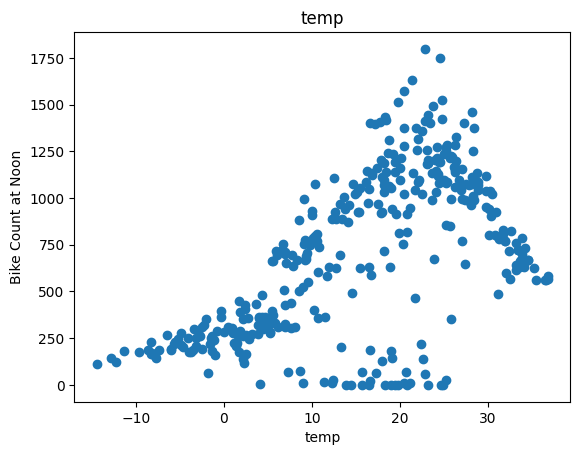

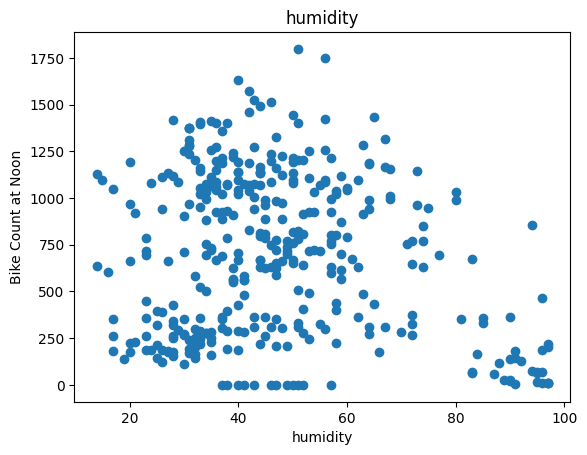

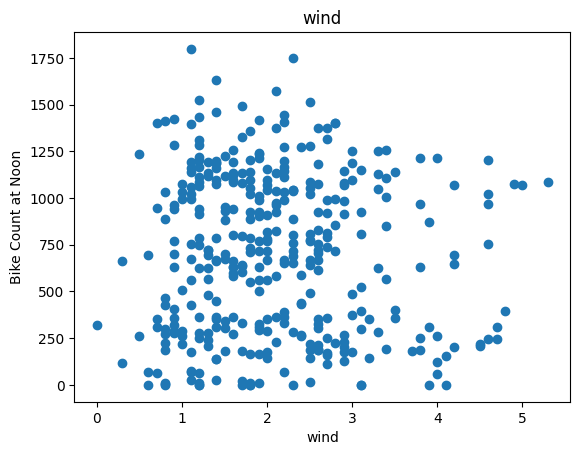

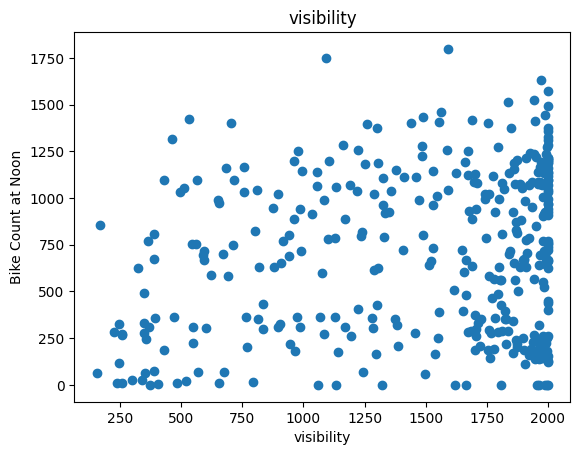

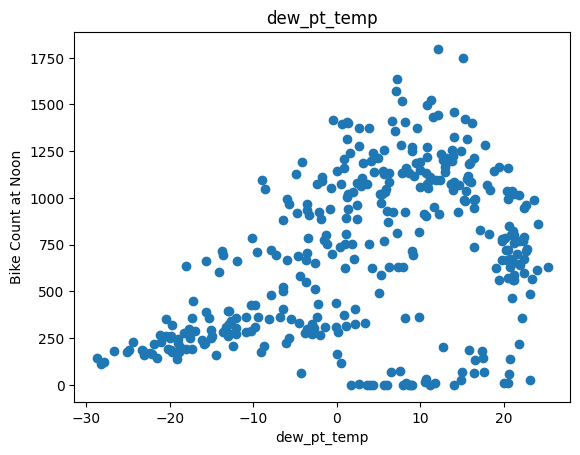

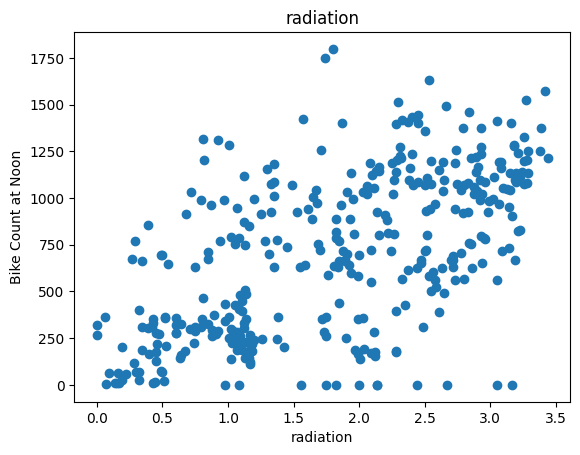

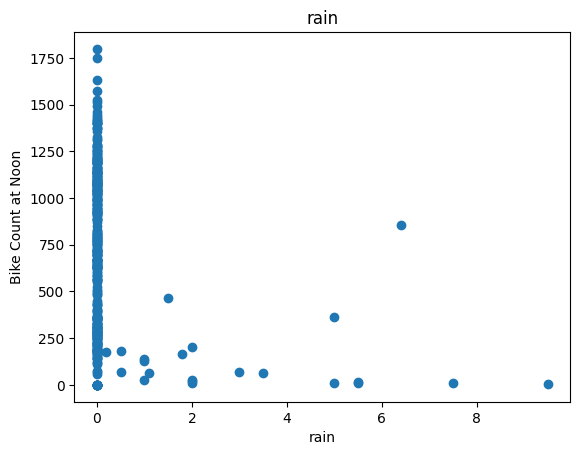

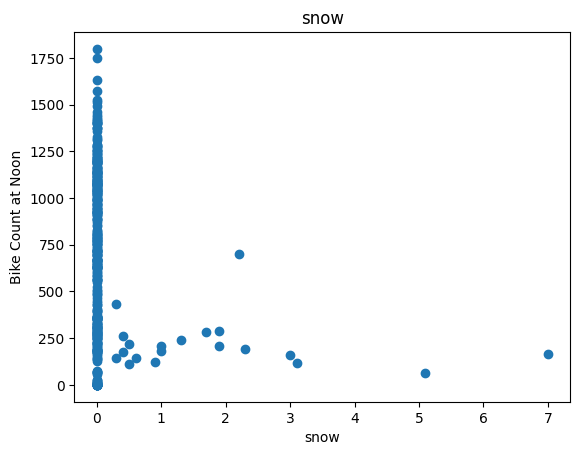

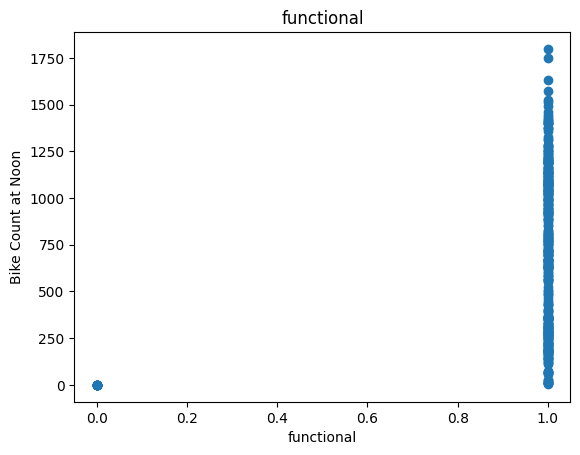

In [473]:
for label in df.columns[1:]:
    # New figure
    plt.figure()
    
    # Plot scatter each feature
    plt.scatter(df[label], df["bike_count"])
    plt.title(label)
    plt.ylabel("Bike Count at Noon")
    plt.xlabel(label)
    plt.show()

In [474]:
# DROP THE FEATURE THAT DOESN'T REALLY IMPORTANT (BASED ON THE VISUALIZATION)
df = df.drop(["wind", "visibility", "functional"], axis=1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# **PREPARING DATASET FOR TRAINING, VALIDATION, AND TEST**

Sampling, scaling, normalization/standardization, oversampling, etc.

In [475]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [476]:
import copy

# SCALING FUNCTION
# Passing the name of y_label and what specific x_labels we want to look at
def get_xy(dataframe, y_label, x_labels=None):
    
    # Copying everything
    dataframe = copy.deepcopy(dataframe)
    
    # Getting all the features (except target or label) and make it into NumPy array
    
    # If x_labels is none (nothing want to be specificated), take all the columns except y_label itself
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        # If passing 1 x_labels, add just that label and reshape it into 2D
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        # Passing more than 1 x_labels
        else:
            X = dataframe[x_labels].values
    
    # Getting the target and make it into array
    y = dataframe[y_label].values.reshape(-1, 1)
    
    # Stacking the X and y horizontally (merging the data in a 2D array horizontal stack)
    data = np.hstack((X, y))

    return data, X, y

# **LINEAR REGRESSION**

# **Simple Linear Regression**

In [477]:
# In this case and declaration, I'm training and testing it with specified x_labels = Temperature
# _ can be means train, valid, test but in this case I'm making this as a new variable, _
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_valid_temp, y_valid_temp = get_xy(valid, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

So we have training, testing, and validation datasets for just the temperature.

In [478]:
from sklearn.linear_model import LinearRegression

In [479]:

temp_reg = LinearRegression()

# Fitting the model into the dataset
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

y = a + bx

Intercept = a

Coefficient = b

In [480]:
# Getting the coefficient and intercept
print(temp_reg.coef_, temp_reg.intercept_)

[[19.20296192]] [387.58823766]


Concept of Coefficient of Determination

The closer the number to 1, the better predictor or with that label (the better that the two variable would be correlated )

In [481]:
# Getting the R^2 (Coefficient of Determination)
temp_reg.score(X_test_temp, y_test_temp)

0.3049691446946584

This is better than 0 so there's an association, but not too good.

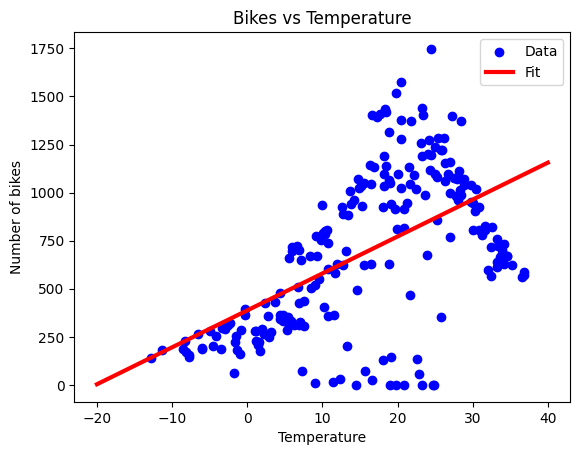

In [482]:
# Scatter the data
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")

# Creates a balanced (uniform) series of values from -20 to 40, for a total of 100 values in between
x = tf.linspace(-20, 40, 100)

# Reshape it into 2D
x = np.reshape(x, (-1,1))

# Plot the linear regression
plt.plot(x, temp_reg.predict(x), label="Fit", color="red", linewidth=3)

plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Number of bikes")
plt.title("Bikes vs Temperature")
plt.show()

# **Multiple Linear Regression**

In [483]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

# In this case and declaration, we are training and testing it with all the labels except dropped label and target itself
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_valid_all, y_valid_all = get_xy(valid, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [484]:
all_reg = LinearRegression()

# Fitting the model into the dataset
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [485]:
# Getting the R^2 (Coefficient of Determination)
all_reg.score(X_test_all, y_test_all)

0.4063715203127497

The score is dynamic, it can changes every run, but in average multiple linear regression score is slighty higher than simple linear regression.

## **NN**

# **Regression with a Neuron**

In [486]:
# MAKE NORMALIZATION LAYER

# Normalization: change the distribution of temperature data into a more standard or normal distribution, with a mean of zero and a standard deviation of one.

# Input shape 1D
temp_normalizer= tf.keras.layers.Normalization(input_shape=(1,), axis=None)

# Adapt normalized value in X_train_temp (X_train_temp is reshaped first into 1D)
temp_normalizer.adapt(X_train_temp.reshape(-1))

c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [487]:
# MAKE A NEURON MODEL
temp_1n_model = tf.keras.Sequential([
    temp_normalizer,
    # Unlike Neural Network in Classification, there's no activation because the output is going to be linear.
    tf.keras.layers.Dense(1)
])

# COMPILING MODEL
# Learning rate etc, affects the training performance
temp_1n_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss="mean_squared_error")

# FITTING THE MODEL INTO THE DATASET
history = temp_1n_model.fit(
        X_train_temp, y_train_temp, epochs=1000, validation_data=(X_valid_temp, y_valid_temp), verbose=0
    )

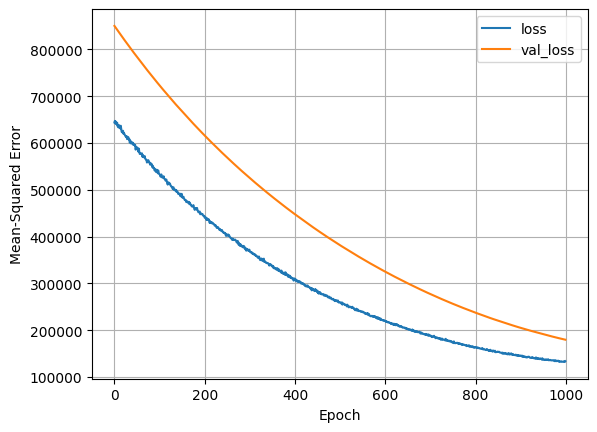

In [488]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Mean-Squared Error')
  plt.legend()
  plt.grid(True)
  plt.show()


plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


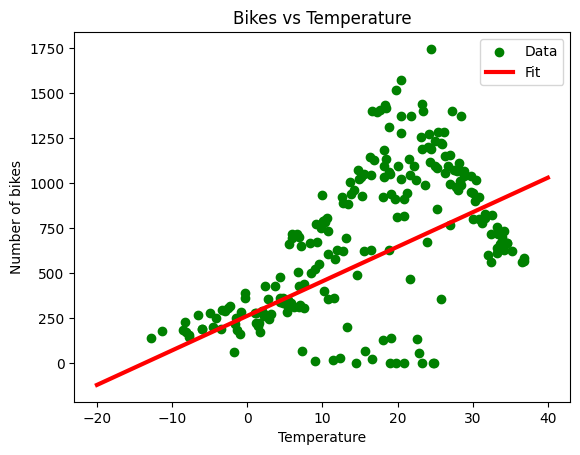

In [489]:
# Scatter the data
plt.scatter(X_train_temp, y_train_temp, label="Data", color="green")

# Creates a balanced (uniform) series of values from -20 to 40, for a total of 100 values in between
x = tf.linspace(-20, 40, 100)

# Reshape it into 2D
x = np.reshape(x, (-1,1))

# Plot the linear regression
plt.plot(x, temp_1n_model.predict(x), label="Fit", color="red", linewidth=3)

plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Number of bikes")
plt.title("Bikes vs Temperature")
plt.show()

In [490]:
from sklearn.metrics import r2_score

y_pred = temp_1n_model.predict(X_test_temp)

# Getting the R^2 (Coefficient of Determination)
r2 = r2_score(y_test_temp, y_pred)

r2

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


0.2836332836534694

The average value of this model's R^2 is lower than multiple linear regression.

# **Regression with Neural Net**

In [491]:
# Normalization: change the distribution of temperature data into a more standard or normal distribution, with a mean of zero and a standard deviation of one.

# Input shape 1D
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
# Adapt normalized value in X_train_temp (X_train_temp is reshaped first into 1D)
temp_normalizer.adapt(X_train_temp.reshape(-1))

# MAKE NEURAL NETWORK MODEL
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# COMPILE THE MODEL
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# FITTING THE MODEL INTO THE DATASET
history = temp_nn_model.fit(
        X_train_temp, y_train_temp, epochs=100, validation_data=(X_valid_temp, y_valid_temp), verbose=0
    )

c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


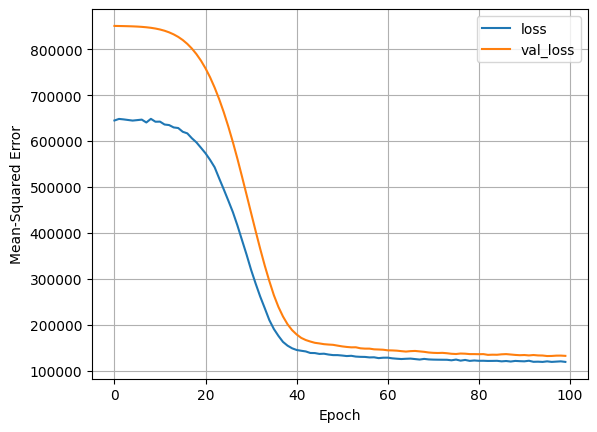

In [492]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


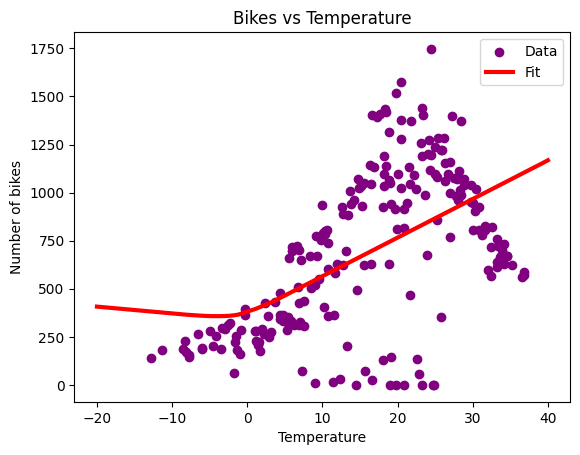

In [493]:
# Scatter the data
plt.scatter(X_train_temp, y_train_temp, label="Data", color="purple")

# Creates a balanced (uniform) series of values from -20 to 40, for a total of 100 values in between
x = tf.linspace(-20, 40, 100)

# Reshape it into 2D
x = np.reshape(x, (-1,1))

# Plot the linear regression
plt.plot(x, temp_nn_model.predict(x), label="Fit", color="red", linewidth=3)

plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Number of bikes")
plt.title("Bikes vs Temperature")
plt.show()

In [494]:
y_pred = temp_nn_model.predict(X_test_temp)

# Getting the R^2 (Coefficient of Determination)
r2nn = r2_score(y_test_temp, y_pred)

r2nn

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.3005029697917073

# **Multiple Regression with Neural Net**

In [499]:
# Normalization: change the distribution of temperature data into a more standard or normal distribution, with a mean of zero and a standard deviation of one.

# Input shape 6 features 1 column
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
# Adapt normalized value in X_train_temp (X_train_temp is reshaped first into 1D)
all_normalizer.adapt(X_train_all)

# MAKE NEURAL NETWORK MODEL
all_nn_model  = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# COMPILE THE MODEL
all_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# FITTING THE MODEL INTO THE DATASET
history = all_nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_valid_all, y_valid_all),
    verbose=0, epochs=100
)

c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


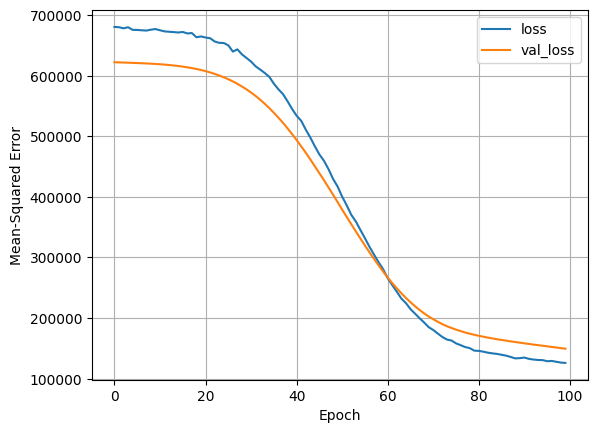

In [497]:
plot_loss(history)

In [509]:
# MEAN-SQUARED ERROR FOR ALL FEATURE LINEAR REGRESSION VS ALL FEATURE NEURAL NETWORK

y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = all_nn_model.predict(X_test_all)

# MSE FUNCTION
def MSE(y_pred, y_real):
    return np.mean((np.square(y_pred - y_real)))

print(MSE(y_pred_lr, y_test_all))
print(MSE(y_pred_nn, y_test_all))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
95220.38354692051
129178.89466851811


We can see that Neural Network has larger MSE than Linear Regression.

Let's see the prediction vs actual value of each model in a scatter

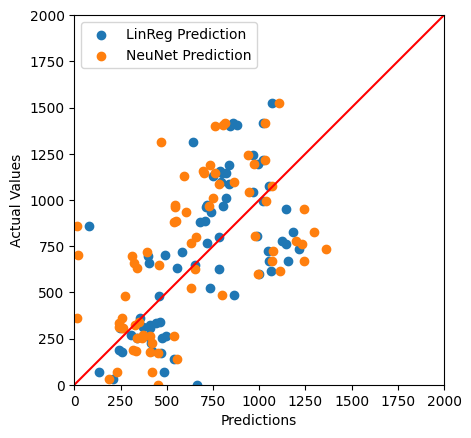

In [529]:
ax = plt.axes(aspect="equal")
plt.scatter(y_pred_lr, y_test_all,  label="LinReg Prediction")
plt.scatter( y_pred_nn, y_test_all, label="NeuNet Prediction")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")

# Limits to 2000 both x and y axis (approximate bike count)
limits = [0, 2000]
plt.xlim(limits)
plt.ylim(limits)

plt.legend()

# Plot with limit from (0, 0) to (2000, 2000)
plt.plot(limits, limits, c="red")

The red line means accuracy between an actual value and a prediction. The further the data points means lower accuraccy.